## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df['Mouse ID'].value_counts())

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID and Timepoint. 
duplicated_rows = merge_df[merge_df.duplicated()]
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.loc[merge_df["Mouse ID"] != "g989"]

In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug 
#regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.

#merge_df.columns
#merge_df["Drug Regimen"].unique()

summary_stats = cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]]
#summary_stats

summary_mean = summary_stats.groupby("Drug Regimen").mean()
tumor_mean = summary_mean.rename(columns={"Tumor Volume (mm3)": "Tumor Vol Mean"})


summary_median = summary_stats.groupby("Drug Regimen").median()
tumor_median = summary_median.rename(columns={"Tumor Volume (mm3)": "Tumor Vol Median"})


summary_var = summary_stats.groupby("Drug Regimen").var()
tumor_var = summary_var.rename(columns={"Tumor Volume (mm3)": "Tumor Vol Var"})

summary_std = summary_stats.groupby("Drug Regimen").std()
tumor_std = summary_std.rename(columns={"Tumor Volume (mm3)": "Tumor Vol StD"})


summary_sem = summary_stats.groupby("Drug Regimen").sem()
tumor_sem = summary_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Vol SEM"})


# Assemble the resulting series into a single summary dataframe.
summary_table = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
summary_table = pd.merge(summary_table, tumor_var, on="Drug Regimen")
summary_table = pd.merge(summary_table, tumor_std, on="Drug Regimen")
summary_table = pd.merge(summary_table, tumor_sem, on="Drug Regimen")
summary_table


,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Var,Tumor Vol StD,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen. Using the aggregation method, produce the same summary.
agg_summary = summary_stats.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

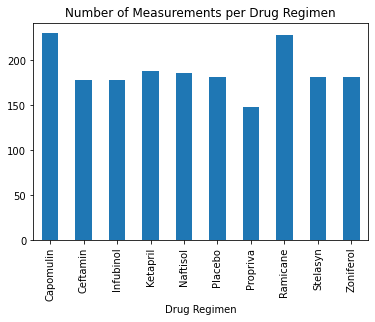

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_group = cleaned_df.groupby("Drug Regimen")
regimen_count = regimen_group["Timepoint"].count()
measure_chart = regimen_count.plot(kind="bar", title="Number of Measurements per Drug Regimen")


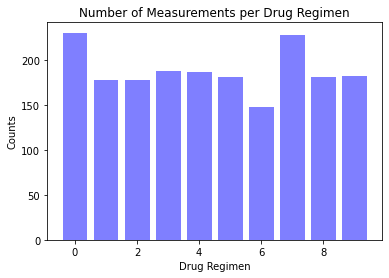

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(regimen_count))
#tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
#plt.xticks(tick_locations, regimen_count["Drug Regimen"], rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel('Counts')
plt.title("Number of Measurements per Drug Regimen")
plt.show()



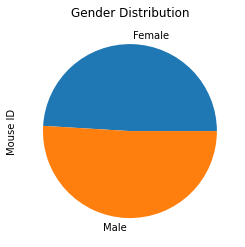

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = cleaned_df.groupby('Sex')
gender_count = gender_groups['Mouse ID'].count()
#gender_count



measure_chart = gender_count.plot(kind="pie", title="Gender Distribution")

([<matplotlib.patches.Wedge at 0x2cbe59812b0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

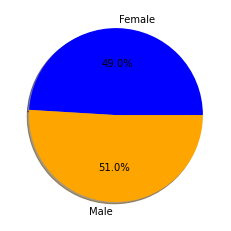

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = gender_count # count per sex
colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 
#cleaned_df.head()

# The last (greatest) timepoint for each mouse
mouse_group = cleaned_df.groupby("Mouse ID")
last_timepoint = mouse_group["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(last_timepoint, cleaned_df, on=("Mouse ID", "Timepoint"))
timepoint_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
timepoint_merge.columns

Index(['Mouse ID', 'Timepoint', 'Drug Regimen', 'Sex', 'Age_months',
       'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [25]:
# List of treatments needed for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to hold tumor vol data (for plotting)
tumor_volume_cap = []
tumor_volume_ram = []
tumor_volume_inf = []
tumor_volume_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatement in treatments_list: 
    
    temp_df = timepoint_merge[timepoint_merge['Drug Regimen'] == treatement]
    quartiles = temp_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
        
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq-lowerq
    
    
    print(f"For the drug treatment {treatement}:")
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier_tumor_vol = temp_df.loc[(temp_df['Tumor Volume (mm3)'] < lower_bound) | 
                                        (temp_df['Tumor Volume (mm3)'] > upper_bound)]
    outlier_tumor_vol




For the drug treatment Capomulin:
The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
For the drug treatment Ramicane:
The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
For the drug treatment Infubinol:
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518

In [29]:
# Locate the rows which contain mice on each drug and append tumor_volume lists for each treatment. 
timepoint_merge.loc[timepoint_merge['Drug Regimen'] == "Capomulin"]
tumor_volume_cap.append(temp_df['Tumor Volume (mm3)'])
#print(tumor_volume_cap)

timepoint_merge.loc[timepoint_merge['Drug Regimen'] == "Ramicane"]
tumor_volume_ram.append(temp_df['Tumor Volume (mm3)'])
#print(tumor_volume_ram)

timepoint_merge.loc[timepoint_merge['Drug Regimen'] == "Infubinol"]
tumor_volume_inf.append(temp_df['Tumor Volume (mm3)'])
#print(tumor_volume_inf)

timepoint_merge.loc[timepoint_merge['Drug Regimen'] == "Ceftamin"]
tumor_volume_cef.append(temp_df['Tumor Volume (mm3)'])
#print(tumor_volume_cef) 

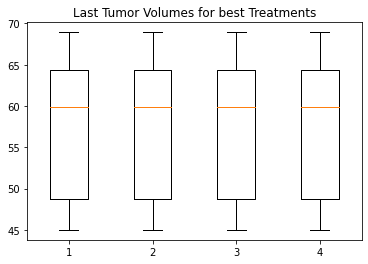

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [tumor_volume_cap, tumor_volume_ram, tumor_volume_inf, tumor_volume_cef]
fig, ax = plt.subplots()
ax.set_title('Last Tumor Volumes for best Treatments')
#ax.set_label(treatments_list)
ax.boxplot(data)

plt.show()


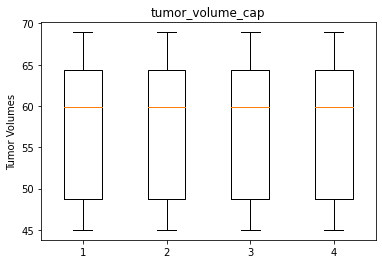

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('tumor_volume_cap')
ax1.set_ylabel('Tumor Volumes')
ax1.boxplot(tumor_volume_cap)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
mouse_random = capomulin_df["Mouse ID"].sample()
mouse_random

In [ ]:
# line plot syntax:
mouse_random_id = capomulin_df.loc[capomulin_df["Mouse ID"] == "l897"]
x = mouse_random_id["Timepoint"]
y = mouse_random_id["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs. Timepoint for mouse treated with Capomulin")


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mean = capomulin_df.groupby("Mouse ID").mean()
#capomulin_mean

x_axis = capomulin_mean["Weight (g)"]
y_axis = capomulin_mean["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylim(32, 48)
plt.xlim(14, 26)
plt.title("Average Tumor Volum vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
!jt -t chesterish